In [1]:
%reload_ext watermark
%watermark -p networkx,matplotlib,urllib2 -v -n

Fri Sep 30 2016 

CPython 2.7.12
IPython 4.2.0

networkx 1.11
matplotlib 1.5.1
urllib2 2.7


# Creating Graphs from Stanford GraphBase

- http://ftp.cs.stanford.edu/pub/sgb/homer.dat

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt 
import urllib2

%matplotlib inline

In [3]:
homer = urllib2.urlopen('http://ftp.cs.stanford.edu/pub/sgb/homer.dat')

In [4]:
def read_nodes(homer):
    """Reads in the nodes of the graph from the input file.
    
    Args:
        homer: A handle for the file containing the graph data, starting at the top.
        
    Returns:
        A generator of the nodes in the graph, yielding a list of the form:
            ['CH', 'AG, 'ME', ...]
    """
    line = homer.readline()
    while line != '\n':
        line = line.replace('\n', '')
        if len(line) != 0:
            if line[0] != '*':
                if line[:2] != '1:':
                    yield line[:2]
                else: break
        line = homer.readline()  

In [5]:
def read_edges(homer):
    """Reads in the edges of the graph from the input file.
    
    Args:
        homer: A handle for the file containing the graph data, starting at the top 
            of the edges section.
            
    Returns:
        A generator of the edges in the graph, yielding a list of pairs of the form:
            [('CH', 'AG'), ('AG', 'ME'), ...]
    """

    for line in homer.readlines():
        line = line.replace('\n', '')
        if len(line) > 1:
            if ':' in line:
                idx = line.index(':')
                line = line[(idx+1):]
                all_related_nodes = line.split(';')
                for related_nodes in all_related_nodes:
                    related_nodes = related_nodes.split(',')
                    for idx_node1 in range(len(related_nodes)-1):
                        for idx_node2 in range(idx_node1+1, len(related_nodes)):
                            pair = (related_nodes[idx_node1], related_nodes[idx_node2])
                            yield pair

In [6]:
G = nx.Graph()
G.add_nodes_from(read_nodes(homer))
G.add_edges_from(read_edges(homer))

In [7]:
G.nodes()[:10]
#list(read_nodes(homer))[:10]

['G2', 'G1', 'G0', 'GS', 'GR', 'GL', '3Z', '3Y', '3X', '3S']

In [8]:
G.edges()[:10]
#list(read_edges(homer))[:10]

[('G2', 'AC'),
 ('G2', 'F2'),
 ('G1', 'PA'),
 ('G0', 'TM'),
 ('GS', 'DI'),
 ('GS', 'EO'),
 ('GS', 'HT'),
 ('GS', 'TS'),
 ('GS', 'HE'),
 ('GS', 'RU')]

In [9]:
# get graph info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 561
Number of edges: 1629
Average degree:   5.8075


# Simple Graph

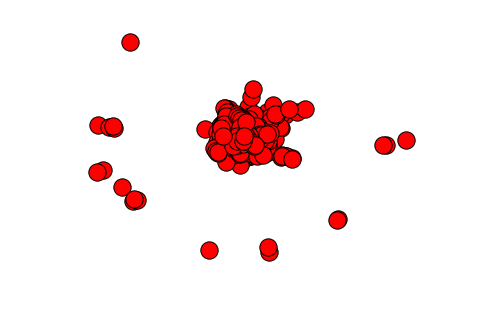

In [10]:
nx.draw(G)

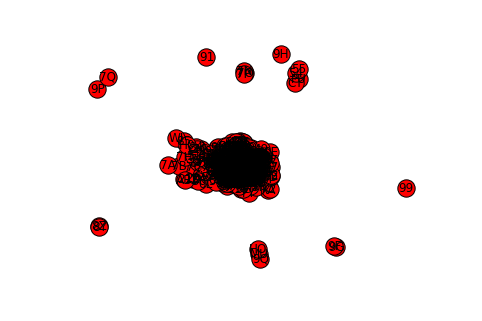

In [11]:
nx.draw(G, with_labels=True)

# Save Graph

In [12]:
nx.write_gexf(G, 'data/homer.gexf')